In [21]:
# !pip install standard-precip

In [22]:
import dataretrieval as dr
from standard_precip.spi import SPI as SPI_Calculator
from standard_precip.utils import plot_index
import numpy as np
import spei as si  # si for standardized index
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

In [23]:
# first import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# specify the USGS site code for which we want data.
# We chose the Lees Ferry
site = '09382000'


# get daily values (dv)
data = nwis.get_record(sites=site, service='dv', start='1900-12-31', end='2020-01-01')
data = data.reset_index()
# data["datetime"] = data.index


# # get basic info about the site
site_info = nwis.get_record(sites=site, service='site')

In [24]:
discharge_timeseries = data["00060_Mean"]

<Axes: >

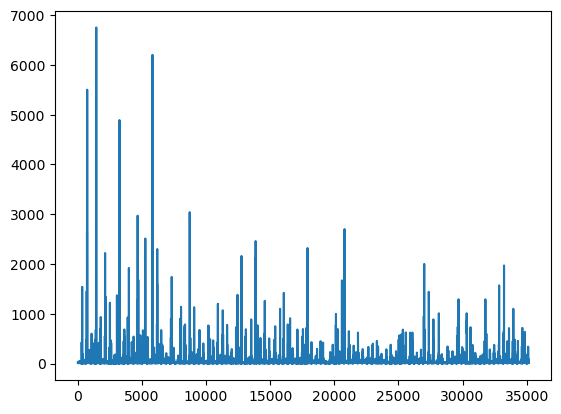

In [25]:
discharge_timeseries.plot.line()

In [26]:
spi_calculator = SPI_Calculator()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35157 entries, 0 to 35156
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   datetime       35157 non-null  datetime64[ns, UTC]
 1   site_no        35157 non-null  object             
 2   00060_Mean     35157 non-null  float64            
 3   00060_Mean_cd  35157 non-null  object             
 4   80154_Mean     11297 non-null  float64            
 5   80154_Mean_cd  11297 non-null  object             
 6   80155_Mean     11297 non-null  float64            
 7   80155_Mean_cd  11297 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 2.1+ MB


In [27]:
ACCUMULATION_WINDOW_IN_DAYS = 365
# DROUGHT_LENGTH = 365*20
spi = spi_calculator.calculate(
    data, 
    'datetime', 
    '00060_Mean', 
    freq="D", 
    scale=ACCUMULATION_WINDOW_IN_DAYS, 
    fit_type="lmom", 
    dist_type="gev"
)
spi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35157 entries, 0 to 35156
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   datetime                               35157 non-null  datetime64[ns, UTC]
 1   00060_Mean_scale_365                   34793 non-null  float64            
 2   00060_Mean_scale_365_calculated_index  34793 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 824.1 KB


<Axes: xlabel='datetime'>

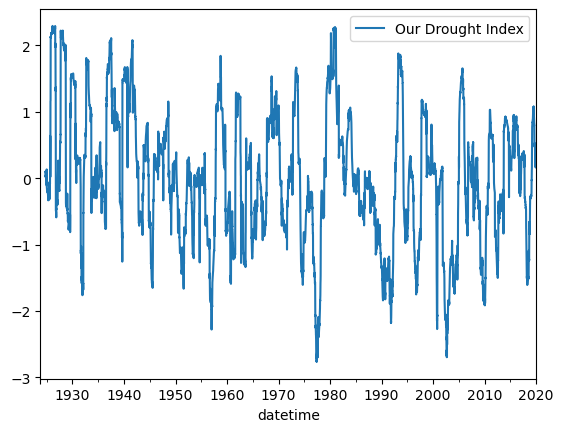

In [28]:
spi = spi.rename(columns = {f"00060_Mean_scale_{ACCUMULATION_WINDOW_IN_DAYS}_calculated_index": "Our Drought Index"})
spi.plot(x="datetime", y = f"Our Drought Index")
# spi['rolling mean'] = spi['Our Drought Index'].rolling(DROUGHT_LENGTH, min_periods=1).apply(np.mean)
# spi.plot(x="datetime", y = f"rolling mean")



In [37]:
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data = data[data["month"] == 10]
data = data[data["day"] == 1]

In [30]:
spi["rolling_mean"].isnull().sum()

KeyError: 'rolling_mean'

In [ ]:
si.ssfi(data["00060_Mean"])

ERROR:root:Duplicated indices found. Please remove them. For instance by using `series = series.loc[~series.index.duplicated(keep='first/last')]`


ValueError: Duplicated indices found. Please remove them. For instance by using `series = series.loc[~series.index.duplicated(keep='first/last')]`